# Query

select * from `ftds-hacktiv8-project.phase1_ftds_015_rmt.credit-card-information` where mod(CUST_ID, 2) = 1

# Perkenalan

Nama      : Immanuel Yosia Alfrenco

Batch     : FTDS-015

Dataset   : Credit Card Dataset

Objective : Membuat model clustering untuk melakukan Customer Segmentation dari data kartu kredit sebuah bank dibawah ini. Data ini merupakan data informasi penggunaan kartu kredit selama 6 bulan terakhir.


# Import Libraries

In [78]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

# Untuk membuat model
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering as SC, AgglomerativeClustering as AC
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score,silhouette_samples

# Untuk menyiapkan dataset
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler

# Data Loading

In [79]:
# Import data CSV
data_ori = pd.read_csv('h8dsft_P1G4_immanuel_yosia_alfrenco.csv')

In [80]:
# Melakukan duplikasi data untuk backup
data = data_ori.copy()

Setelah data berhasil diimport saya akan mengecek head, tail dan informasi dasar dari data kita.

In [81]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3091,3.833185,0.125,45.00,45.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,500.0,0.000000,NaN,0.0,8
1,5069,0.000000,0.000,176.03,176.03,0.0,0.0,0.125,0.125,0.0,0.0,0,1,7000.0,0.000000,NaN,0.0,8
2,6075,757.964752,0.875,157.40,157.40,0.0,0.0,0.125,0.125,0.0,0.0,0,6,1200.0,1494.480376,2638.598410,0.0,8
3,6291,264.566591,0.375,1150.00,1150.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,1200.0,3029.380326,85.428885,0.0,8
4,7755,440.613643,1.000,600.00,600.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,1000.0,215.316424,137.846006,0.0,8


In [82]:
data.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
4470,2345,9629.808851,1.0,0.0,0.0,0.0,4372.393835,0.000000,0.000000,0.0,0.545455,9,0,12000.0,2468.988022,2134.295731,0.0,11
4471,6785,1040.030221,1.0,0.0,0.0,0.0,1390.648290,0.000000,0.000000,0.0,0.545455,18,0,1400.0,290.129620,287.994171,0.0,11
4472,7347,1322.818587,1.0,0.0,0.0,0.0,762.301096,0.000000,0.000000,0.0,0.545455,11,0,1500.0,1035.627320,312.835530,0.0,11
4473,8447,1060.391273,1.0,0.0,0.0,0.0,1475.858013,0.000000,0.000000,0.0,0.545455,10,0,2000.0,407.360560,277.084736,0.0,11
4474,1995,3447.674222,1.0,205.0,205.0,0.0,4548.057776,0.090909,0.090909,0.0,0.545455,7,1,10500.0,665.239171,817.844662,0.0,11


In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

Kita bisa lihat ternyata data kita terdiri dari 18 kolom dan semuanya bertipe numeric.

# Exploratory Data Analysis (EDA)

## Numerical Data Summary

In [84]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CUST_ID,4475.0,4475.000000,2583.931114,1.000000,2238.000000,4475.000000,6712.000000,8949.00000
BALANCE,4475.0,1563.205717,2072.045789,0.000000,124.432849,871.355430,2047.570799,18495.55855
BALANCE_FREQUENCY,4475.0,0.876933,0.238222,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,4475.0,1003.251343,2060.034730,0.000000,39.560000,360.000000,1102.420000,41050.40000
ONEOFF_PURCHASES,4475.0,596.369893,1653.425984,0.000000,0.000000,45.650000,575.220000,40624.06000
INSTALLMENTS_PURCHASES,4475.0,407.110215,880.799744,0.000000,0.000000,88.620000,455.885000,14686.10000
CASH_ADVANCE,4475.0,984.288554,2060.448056,0.000000,0.000000,0.000000,1138.887754,47137.21176
PURCHASES_FREQUENCY,4475.0,0.490579,0.402907,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,4475.0,0.202301,0.298203,0.000000,0.000000,0.083333,0.250000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,4475.0,0.363886,0.397603,0.000000,0.000000,0.166667,0.750000,1.00000


## Balance

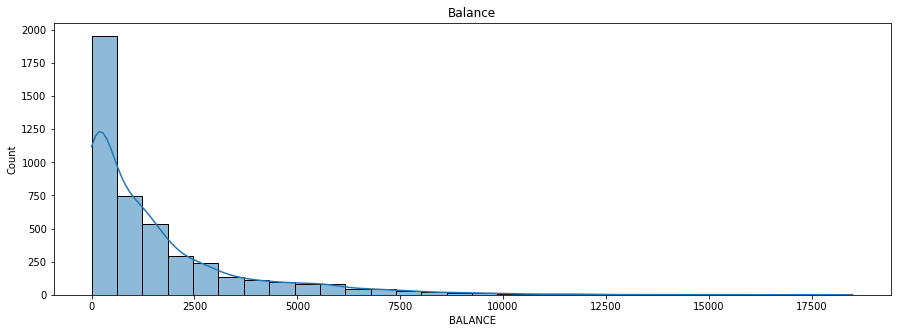

Mean Balance : 1563.2057165459219


In [85]:
plt.figure(figsize = (15, 5))
sns.histplot(data['BALANCE'], bins=30, kde=True)
plt.title('Balance')
plt.show()
print(f'Mean Balance : {data.BALANCE.mean()}')

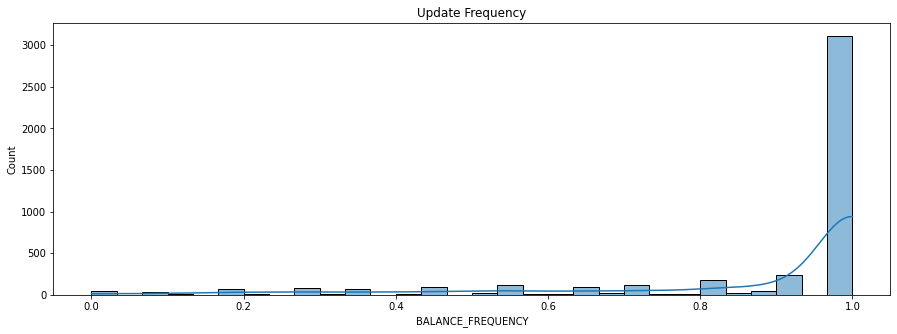

In [86]:
plt.figure(figsize = (15, 5))
sns.histplot(data['BALANCE_FREQUENCY'], bins=30, kde=True)
plt.title('Update Frequency')
plt.show()

Kita bisa lihat jumlah balance yang tersisa pada kartu kredit dimana yang terkecil adalah 0 dan yang tertinggi adalah 18945 dollar dengan rata-rata orang memiliki balance sebesar 1563 dollar. Kita juga bisa melihat bahwa mayoritas koresponden kita melakukan update balance dengan teratur.

## Purchase

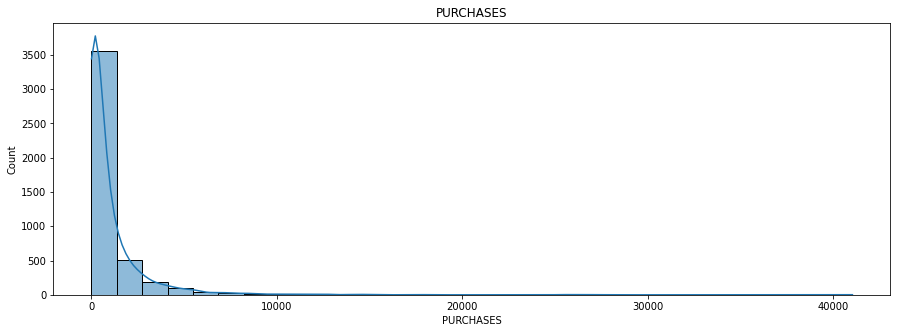

Mean Purchases : 1003.2513430167597


In [87]:
plt.figure(figsize = (15, 5))
sns.histplot(data['PURCHASES'], bins=30, kde=True)
plt.title('PURCHASES')
plt.show()
print(f'Mean Purchases : {data.PURCHASES.mean()}')

Visual di atas menunjukan jumlah pembelian dari suatu akun kartu kredit dimana ada yang berjumlah 0 hingga 41050 dengan rata-rata orang melakukan pembelian sebanyak 1003 dollar dalam satu akun.

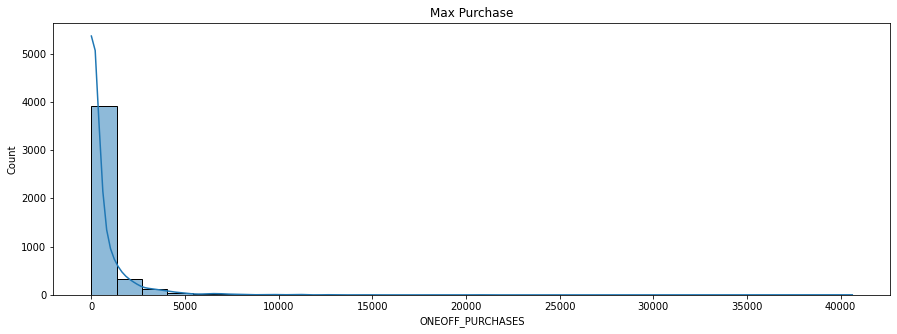

Mean Purchases : 596.3698927374302


In [88]:
plt.figure(figsize = (15, 5))
sns.histplot(data['ONEOFF_PURCHASES'], bins=30, kde=True)
plt.title('Max Purchase')
plt.show()
print(f'Mean Purchases : {data.ONEOFF_PURCHASES.mean()}')

Kita bisa melihat jumlah maksimum pembelian dalam satu kali transaksi dari visual di atas. Persebaran datanya tidak berbeda jauh dengan kolom purchase dimana semakin tinggi transaksinya, semakin sedikit jumlah orang yang melakukanya.

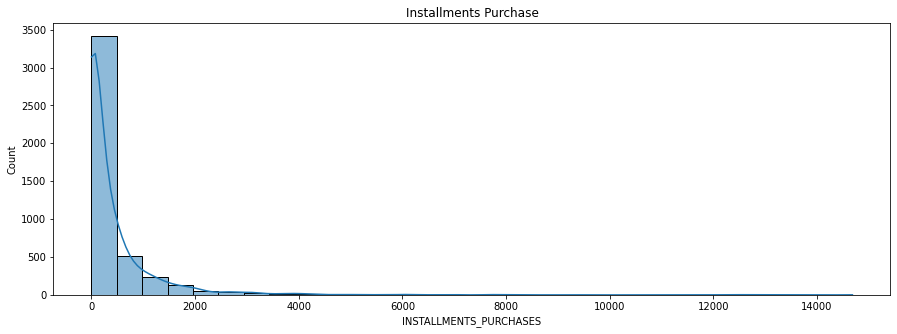

Mean Installment Purchases : 407.11021452513967


In [89]:
plt.figure(figsize = (15, 5))
sns.histplot(data['INSTALLMENTS_PURCHASES'], bins=30, kde=True)
plt.title('Installments Purchase')
plt.show()
print(f'Mean Installment Purchases : {data.INSTALLMENTS_PURCHASES.mean()}')

Visual di atas menunjukan jumlah pembelian menggunakan cicilan dan kita lihat rata-rata orang membeli barang seharga 407 dollar untuk dicicil.

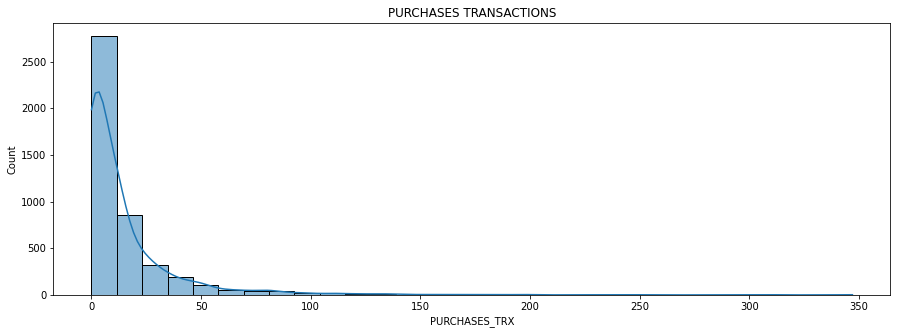

Mean Purchases Transaction : 14.929162011173185


In [143]:
plt.figure(figsize = (15, 5))
sns.histplot(data['PURCHASES_TRX'], bins=30, kde=True)
plt.title('PURCHASES TRANSACTIONS')
plt.show()
print(f'Mean Purchases Transaction : {data.PURCHASES_TRX.mean()}')

Visual di atas menunjukan jumlah transaksi pembelian dari 0 transaksi sampai 347 transaksi dengan rata-rata 14 transaksi pembelian tiap clien.

## Frequency

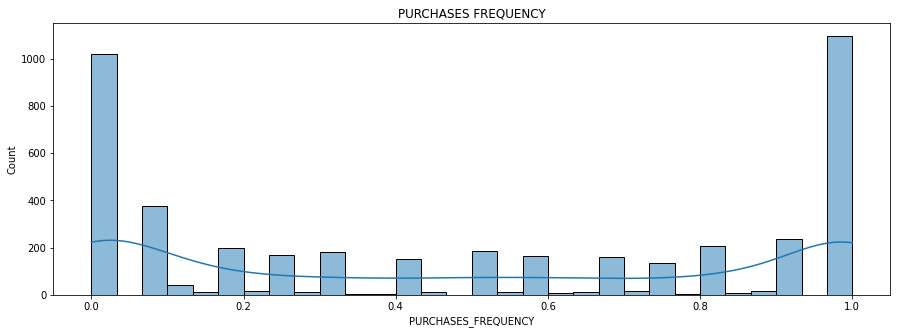

In [91]:
plt.figure(figsize = (15, 5))
sns.histplot(data['PURCHASES_FREQUENCY'], bins=30, kde=True)
plt.title('PURCHASES FREQUENCY')
plt.show()

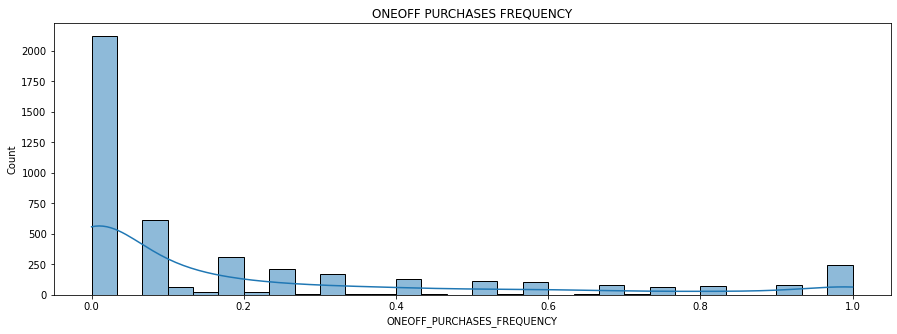

In [92]:
plt.figure(figsize = (15, 5))
sns.histplot(data['ONEOFF_PURCHASES_FREQUENCY'], bins=30, kde=True)
plt.title('ONEOFF PURCHASES FREQUENCY')
plt.show()

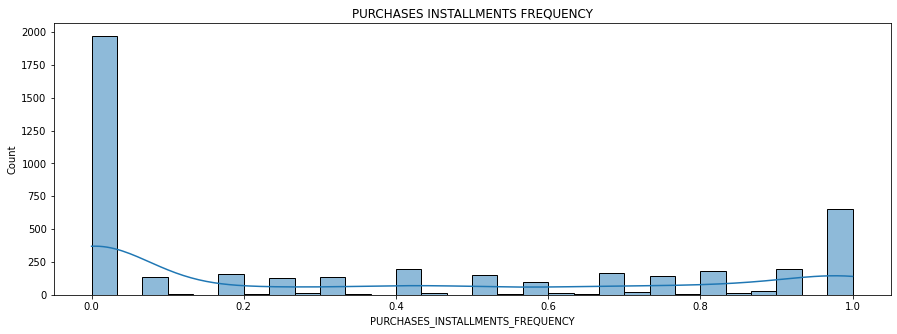

In [93]:
plt.figure(figsize = (15, 5))
sns.histplot(data['PURCHASES_INSTALLMENTS_FREQUENCY'], bins=30, kde=True)
plt.title('PURCHASES INSTALLMENTS FREQUENCY')
plt.show()

3 visual di atas menunjukan frekuensi pembelian, frekuensi pembelian sekali bayar, dan frekuensi pembelian dengan cicilan.

## Cash Advance

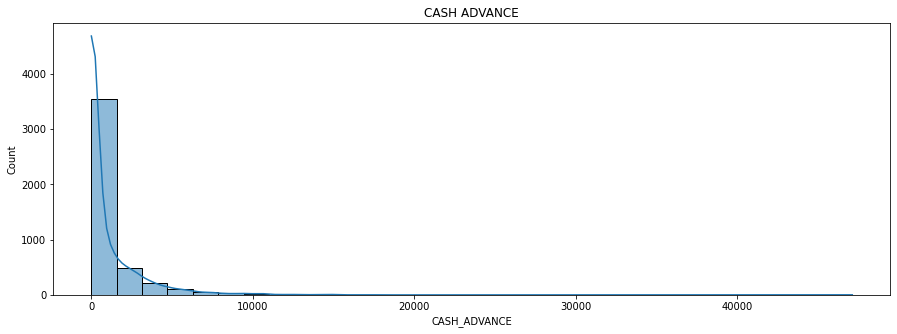

In [95]:
plt.figure(figsize = (15, 5))
sns.histplot(data['CASH_ADVANCE'], bins=30, kde=True)
plt.title('CASH ADVANCE')
plt.show()

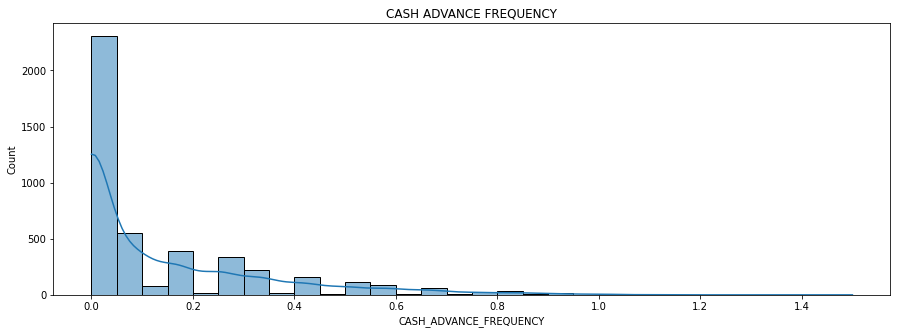

In [96]:
plt.figure(figsize = (15, 5))
sns.histplot(data['CASH_ADVANCE_FREQUENCY'], bins=30, kde=True)
plt.title('CASH ADVANCE FREQUENCY')
plt.show()

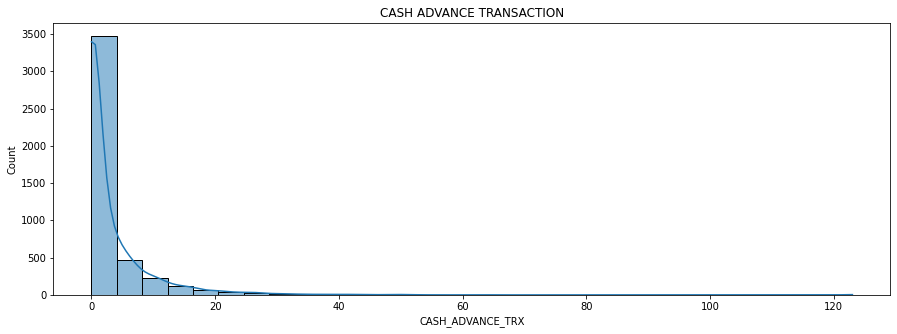

Mean Cash Advance Transaction : 3.30122905027933


In [144]:
plt.figure(figsize = (15, 5))
sns.histplot(data['CASH_ADVANCE_TRX'], bins=30, kde=True)
plt.title('CASH ADVANCE TRANSACTION')
plt.show()
print(f'Mean Cash Advance Transaction : {data.CASH_ADVANCE_TRX.mean()}')

Cash advance merupakan salah satu metode pembayaran yaitu dengan cara mengisikan saldo terlebih dahulu atau deposit sebelum melakukan transaksi dengan kartu kredit. Kita bisa lihat ternyata rata-rata jumlah transaksi menggunakan cash advance hanya 3 transaksi per user.

## Credit Limit

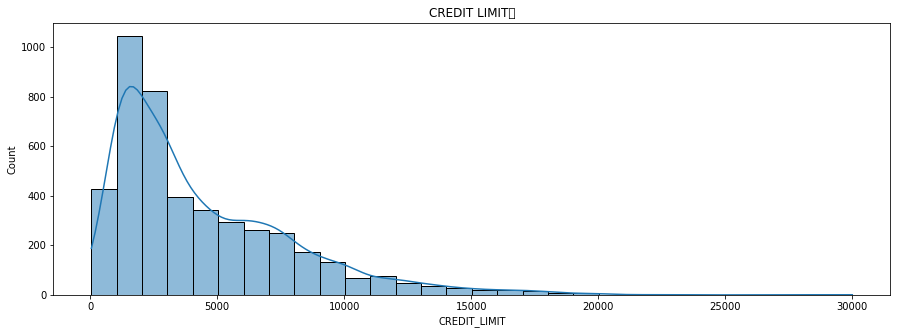

Mean Limit : 4494.87862987419


In [98]:
plt.figure(figsize = (15, 5))
sns.histplot(data['CREDIT_LIMIT'], bins=30, kde=True)
plt.title('CREDIT LIMIT	')
plt.show()
print(f'Mean Limit : {data.CREDIT_LIMIT.mean()}')

Kita bisa lihat rentang limit kartu kredit yang digunakan dari 0 hingga 30000 dollar dengan rata-rata orang memiliki limit 4494 dollar.

## Payments

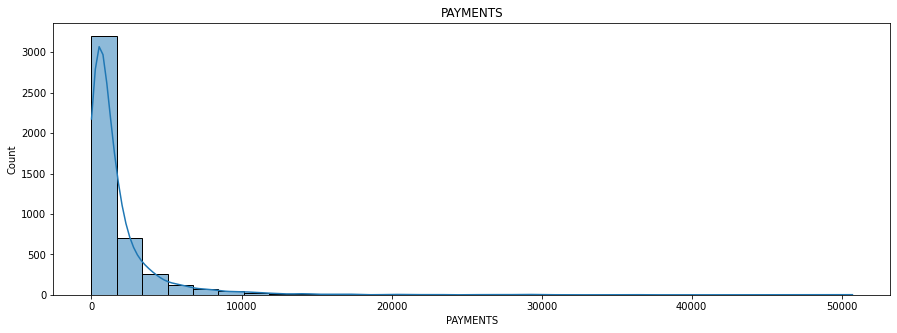

Periode Skewness value :  5.747503259811283
Mean PAYMENTS : 1740.0754302239106


In [99]:
plt.figure(figsize = (15, 5))
sns.histplot(data['PAYMENTS'], bins=30, kde=True)
plt.title('PAYMENTS')
plt.show()
print('Periode Skewness value : ', data.PAYMENTS.skew())
print(f'Mean PAYMENTS : {data.PAYMENTS.mean()}')

Payments adalah pembayaran yang dilakukan untuk melunasi tagihan kartu kredit, kita bsia lihat rata-rata orang membayar 1740 dollar.

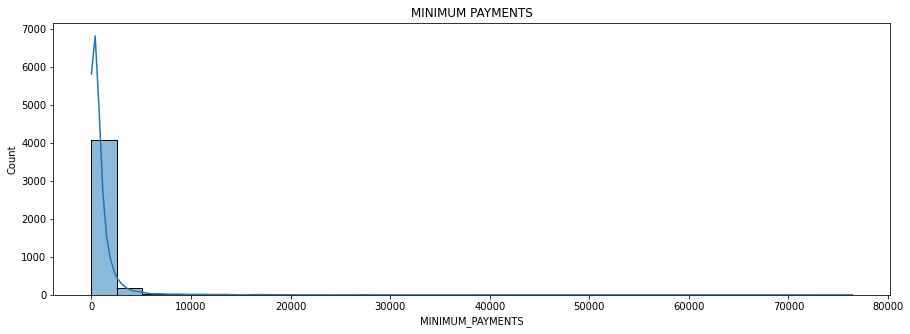

Periode Skewness value :  14.669771084332645
Mean MINIMUM PAYMENTS : 873.9767567081019


In [100]:
plt.figure(figsize = (15, 5))
sns.histplot(data['MINIMUM_PAYMENTS'], bins=30, kde=True)
plt.title('MINIMUM PAYMENTS')
plt.show()
print('Periode Skewness value : ', data.MINIMUM_PAYMENTS.skew())
print(f'Mean MINIMUM PAYMENTS : {data.MINIMUM_PAYMENTS.mean()}')

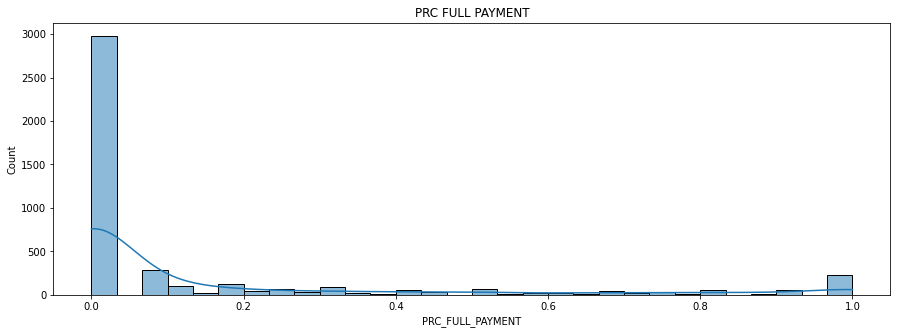

In [101]:
plt.figure(figsize = (15, 5))
sns.histplot(data['PRC_FULL_PAYMENT'], bins=30, kde=True)
plt.title('PRC FULL PAYMENT')
plt.show()

Kita bisa lihat persentase pembayaran penuh oleh user, ada yang selalu membayar penuh tagihanya ada juga yang tidak membayar penuh.

## Tenure

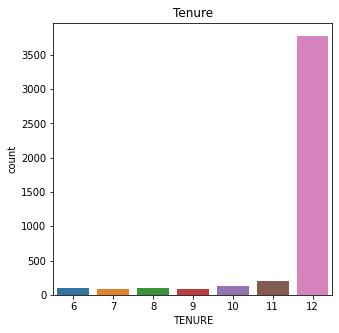

In [102]:
plt.figure(figsize=(5,5))
sns.countplot(data=data, x="TENURE")
plt.title('Tenure')
plt.show()

Tenure merupakan jangka waktu kartu kredit, dan kita bisa lihat mayoritas memiliki jangka waktu 12 bulan untuk kartu kreditnya.

## Correlation Between Column

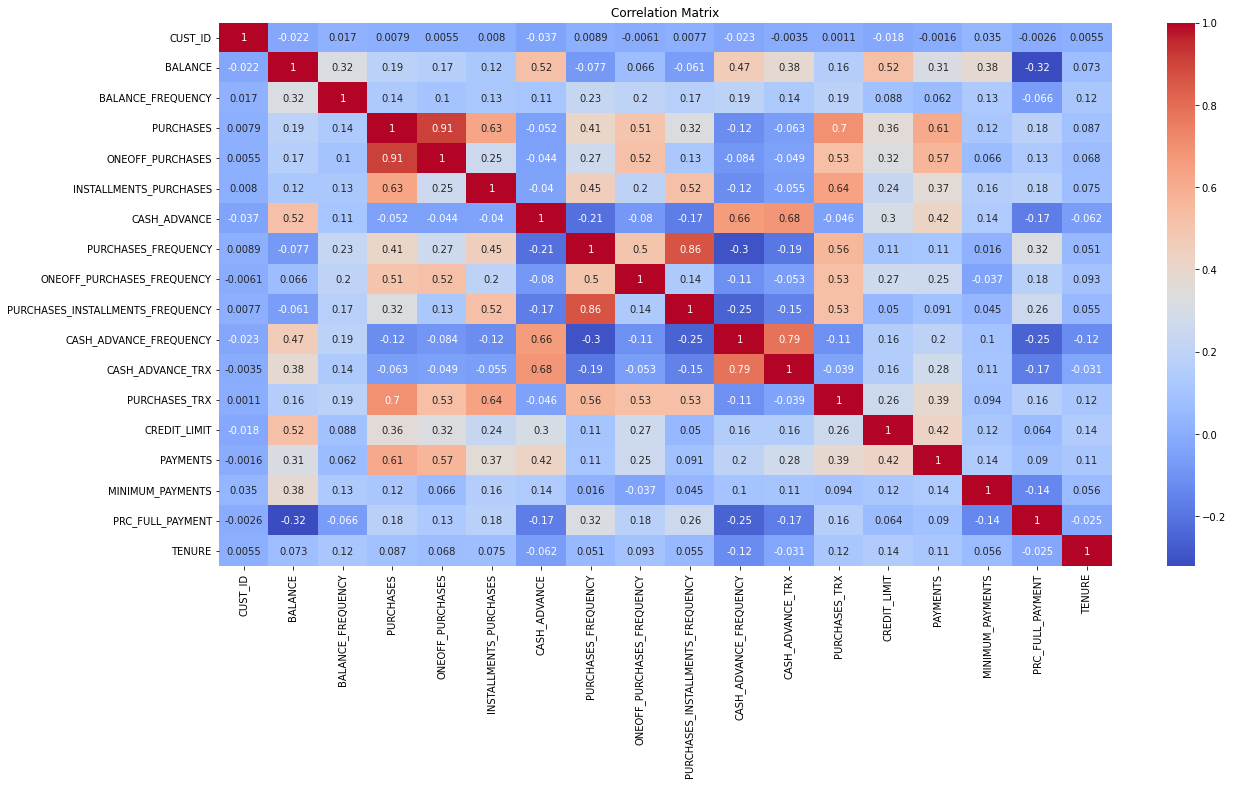

In [103]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Dari heatmap di atas kita bisa lihat korelasi antar kolom pada dataset kita.

# Data Preprocessing

## Splitting Between Train-Set and Test-Set

Kita akan memisahkan data menjadi Train-Set dan juga Test-Set

In [104]:
train, test = train_test_split(data, test_size=0.05, random_state=7)

print("Train Size : ", train.shape)
print("Test Size : ", test.shape)

Train Size :  (4251, 18)
Test Size :  (224, 18)


## Handling Missing Values

Kita akan melakukan check Missing Values pada Train Set dan Test Set

### Train-set

In [105]:
# Mengecek jumlah missing value tiap kolom pada Train-Set

train.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    148
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Ternyata ada missing values pada kolom MINIMUM_PAYMENTS, dan karena kolom tersebut bertipe skewed maka akan dilakukan imputasi menggunakan median.

In [106]:
train.MINIMUM_PAYMENTS.fillna(train.MINIMUM_PAYMENTS.median(), inplace=True)
train.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

### Test-Set

In [107]:
# Mengecek jumlah missing value tiap kolom pada Test-Set

test.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    7
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Kita bisa melihat bahwa pada Test-Set terdapat missing values pada kolom yang sama, maka dari itu akan dilakukan imputasi yang sama seperti pada Train Set.

In [108]:
test.MINIMUM_PAYMENTS.fillna(train.MINIMUM_PAYMENTS.median(), inplace=True)
test.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

## Handling Outliers

### Check Distribution

Sebelum menentukan metode handling outliers, kita harus mengetahui tipe distribusi dari data kita.

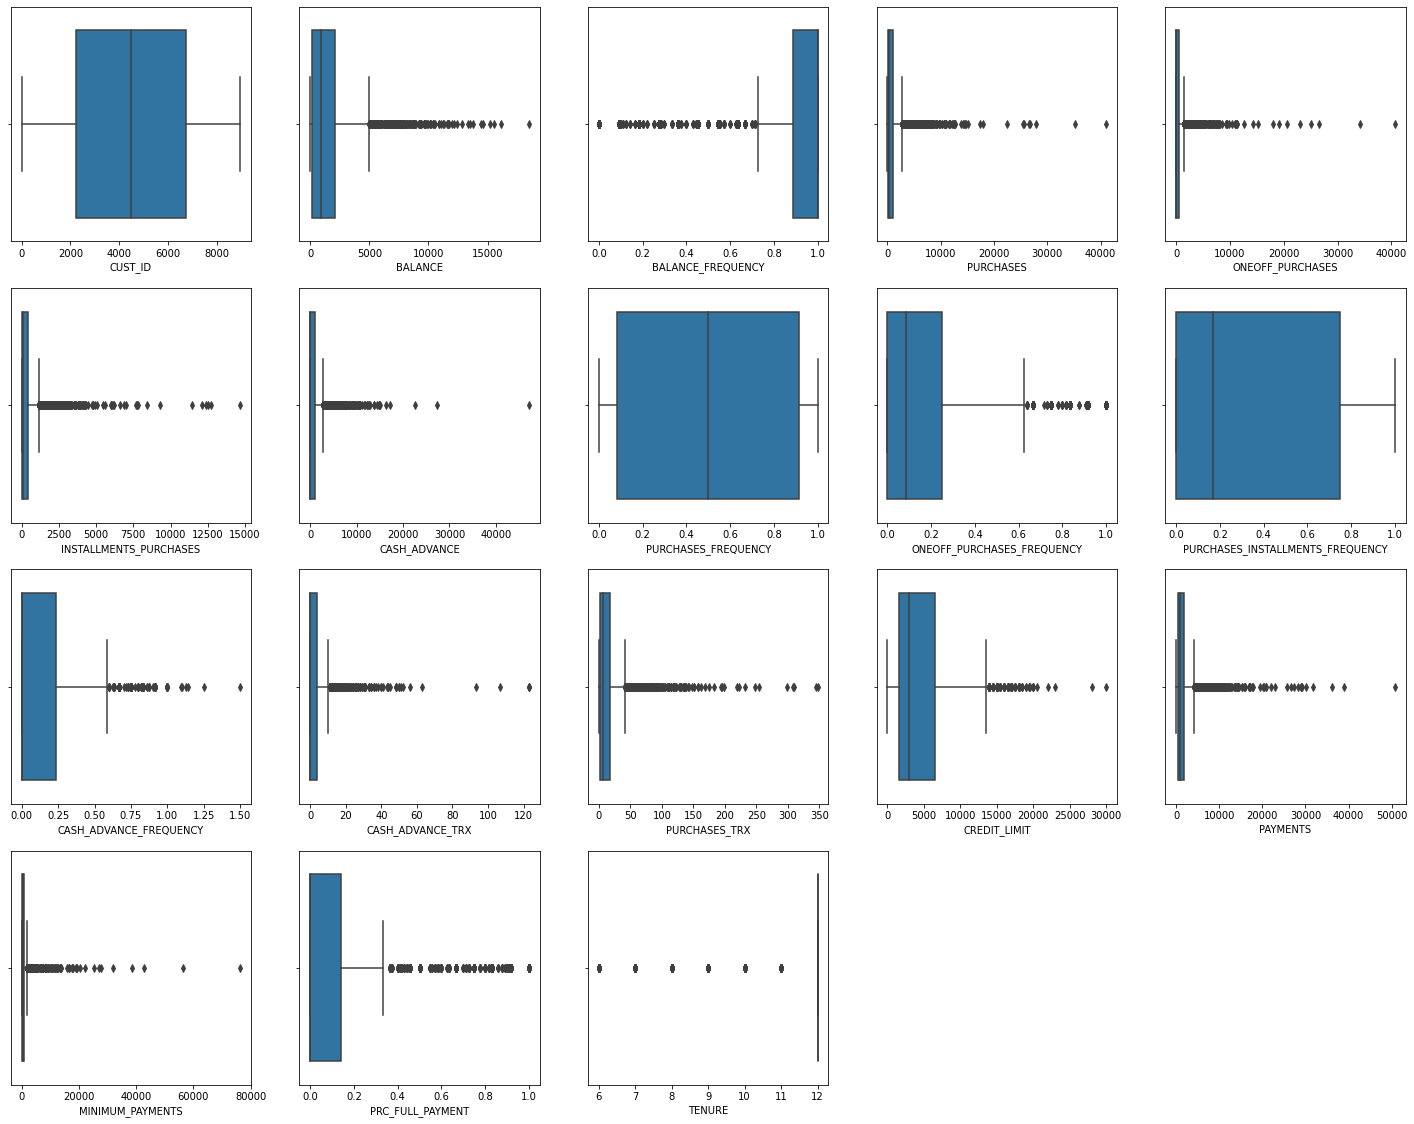

In [109]:
plt.figure(figsize=(25, 25))
for i in train.columns:
    plt.subplot(5, 5, train.columns.get_loc(i) + 1)
    sns.boxplot(x=i, data=train)
plt.show()

Ternyata hampir semua kolom memiliki outliers, maka dari itu akan kita cek jumlah outliersnya dimana jika jumlahnya terlalu banyak akan kita biarkan karena memang merupakan natural outliers. Karena semuanya bertipe skewed maka akan kita cek menggunakan iqr.

In [110]:
def find_skewed_boundaries(df, variable): # untuk distribusi skewed
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * 1.5)
    upper_boundary = df[variable].quantile(0.75) + (IQR * 1.5)

    return df[(df[variable] > lower_boundary) & (df[variable] < upper_boundary)]

In [111]:
cols = train.columns
outlier_precentage = pd.DataFrame(columns=['Column', 'Not Outlier Precentage'])
for i in range(len(cols)):
    outlier_precentage.loc[i] = [cols[i], round(find_skewed_boundaries(train, cols[i]).shape[0] / train.shape[0] * 100, 2)]
outlier_precentage

,Column,Not Outlier Precentage
0,CUST_ID,100.00
1,BALANCE,92.05
2,BALANCE_FREQUENCY,83.23
3,PURCHASES,90.54
4,ONEOFF_PURCHASES,88.26
5,INSTALLMENTS_PURCHASES,90.03
6,CASH_ADVANCE,88.40
7,PURCHASES_FREQUENCY,100.00
8,ONEOFF_PURCHASES_FREQUENCY,87.65
9,PURCHASES_INSTALLMENTS_FREQUENCY,100.00


Karena persen outliers terlalu banyak maka akan kita biarkan karena maerupakan natural outliers dan juga data di atas merupakan data penting karena merupakan data kartu kredit.

## Feature Selection

In [112]:
train = train.drop(columns=['CUST_ID'])
test = test.drop(columns=['CUST_ID'])

In [113]:
train

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
1703,132.353911,1.000000,358.34,0.00,358.34,0.000000,0.916667,0.000000,0.833333,0.000000,0,16,1500.0,85.938437,149.203101,0.00,12
2034,86.206262,1.000000,626.28,210.70,415.58,0.000000,0.833333,0.416667,0.666667,0.000000,0,22,3000.0,729.334233,164.106431,0.00,12
4268,14.891634,0.222222,0.00,0.00,0.00,116.193463,0.000000,0.000000,0.000000,0.111111,1,0,3000.0,0.000000,312.967911,0.00,9
2985,784.959164,1.000000,0.00,0.00,0.00,397.992799,0.000000,0.000000,0.000000,0.083333,2,0,3500.0,223.240044,279.341188,0.00,12
3989,1007.440908,1.000000,430.54,0.00,430.54,687.666124,1.000000,0.000000,1.000000,0.166667,2,21,4000.0,1526.508633,286.221253,0.00,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4307,1222.164025,1.000000,0.00,0.00,0.00,2397.676198,0.000000,0.000000,0.000000,0.416667,10,0,3000.0,385.290048,473.106541,0.00,12
2550,7499.303650,1.000000,350.57,350.57,0.00,948.293789,0.083333,0.083333,0.000000,0.250000,6,3,7500.0,1326.434054,19060.534750,0.00,12
537,331.110003,1.000000,3816.00,0.00,3816.00,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2350.0,3234.025148,1024.833655,0.25,12
1220,1086.853086,1.000000,178.00,178.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,2,1200.0,346.565751,405.644986,0.00,12


In [114]:
test

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2623,4696.525962,0.875000,604.33,435.0,169.33,6400.248453,0.500000,0.375000,0.125000,0.375000,7,5,8000.0,840.965985,930.049801,0.000000,8
2137,134.299115,0.909091,1059.18,0.0,1059.18,0.000000,0.833333,0.000000,0.833333,0.000000,0,10,4000.0,1201.538972,159.033099,0.727273,12
4234,1817.150299,1.000000,596.50,0.0,596.50,1736.759805,0.833333,0.000000,0.833333,0.583333,11,10,3000.0,891.637597,474.182947,0.000000,12
2508,2948.966018,1.000000,4129.97,1804.1,2325.87,451.622190,1.000000,0.750000,1.000000,0.250000,4,56,5000.0,2557.014611,605.697272,0.000000,12
4250,4507.000722,1.000000,7394.18,2288.2,5105.98,5424.701791,1.000000,0.916667,1.000000,0.833333,40,130,11000.0,10460.879460,1076.589500,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,50.853021,1.000000,428.75,0.0,428.75,0.000000,1.000000,0.000000,1.000000,0.000000,0,18,8000.0,319.919021,107.187821,0.090909,12
3015,2502.264409,1.000000,0.00,0.0,0.00,2368.872642,0.000000,0.000000,0.000000,0.083333,2,0,10000.0,541.308981,724.956358,0.000000,12
1460,136.323936,1.000000,289.90,0.0,289.90,0.000000,0.333333,0.000000,0.250000,0.000000,0,4,9500.0,714.619326,209.589155,0.000000,12
2234,161.576879,0.909091,194.00,59.0,135.00,0.000000,0.416667,0.083333,0.333333,0.000000,0,6,5000.0,738.457844,197.425096,0.100000,12


## Scaling

Kita akan melakukan feature scaling menggunakan MinMaxScaler karena kita lihat dari boxplot di atas data kita bertipe skewed.

In [115]:
# Feature scaling menggunakan MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train) #.fit hanya di Train-Set

train_scaled = scaler.transform(train)

In [116]:
# Convert kembali ke bentuk dataframe
train = pd.DataFrame(train_scaled, columns=train.columns)
train

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.007156,1.000000,0.008729,0.000000,0.024400,0.000000,0.916667,0.000000,0.833333,0.000000,0.000000,0.046110,0.048414,0.001694,0.001953,0.00,1.0
1,0.004661,1.000000,0.015256,0.005187,0.028298,0.000000,0.833333,0.416667,0.666667,0.000000,0.000000,0.063401,0.098497,0.014379,0.002148,0.00,1.0
2,0.000805,0.222222,0.000000,0.000000,0.000000,0.002465,0.000000,0.000000,0.000000,0.074074,0.008130,0.000000,0.098497,0.000000,0.004096,0.00,0.5
3,0.042440,1.000000,0.000000,0.000000,0.000000,0.008443,0.000000,0.000000,0.000000,0.055555,0.016260,0.000000,0.115192,0.004401,0.003656,0.00,1.0
4,0.054469,1.000000,0.010488,0.000000,0.029316,0.014589,1.000000,0.000000,1.000000,0.111111,0.016260,0.060519,0.131886,0.030096,0.003746,0.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4246,0.066079,1.000000,0.000000,0.000000,0.000000,0.050866,0.000000,0.000000,0.000000,0.277778,0.081301,0.000000,0.098497,0.007596,0.006192,0.00,1.0
4247,0.405465,1.000000,0.008540,0.008630,0.000000,0.020118,0.083333,0.083333,0.000000,0.166667,0.048780,0.008646,0.248748,0.026151,0.249463,0.00,1.0
4248,0.017902,1.000000,0.092959,0.000000,0.259838,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.034582,0.076795,0.063760,0.013413,0.25,1.0
4249,0.058763,1.000000,0.004336,0.004382,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0.000000,0.005764,0.038397,0.006833,0.005309,0.00,1.0


## Variance Inflation Factor (VIF)

In [117]:
vif_data = pd.DataFrame()
vif_data["feature"] = train.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(train.values, i) for i in range(len(train.columns))]

vif_data

,feature,VIF
0,BALANCE,4.083436
1,BALANCE_FREQUENCY,13.733676
2,PURCHASES,52117.027699
3,ONEOFF_PURCHASES,30793.640299
4,INSTALLMENTS_PURCHASES,9327.966572
5,CASH_ADVANCE,3.526461
6,PURCHASES_FREQUENCY,26.444299
7,ONEOFF_PURCHASES_FREQUENCY,5.593800
8,PURCHASES_INSTALLMENTS_FREQUENCY,17.207426
9,CASH_ADVANCE_FREQUENCY,4.718421


Ternyata fitur yang saling berkaitan hanya ada 7 kolom yaitu `BALANCE_FREQUENCY`, `PURCHASES`, `ONEOFF_PURCHASES`, `INSTALLMENTS_PURCHASES`, `PURCHASES_FREQUENCY`, `ONEOFF_PURCHASES_FREQUENCY`, `PURCHASES_INSTALLMENTS_FREQUENCY`, dan `TENURE` jadi kemungkinan kita bisa mereduksi menjadi hingga 7 dimensi. Kita akan memastikan lagi menggunakan EVR.

## Eplained Variance Ratio

In [118]:
pca=PCA(whiten=True)
pca.fit(train)
cumsum = np.cumsum(pca.explained_variance_ratio_)

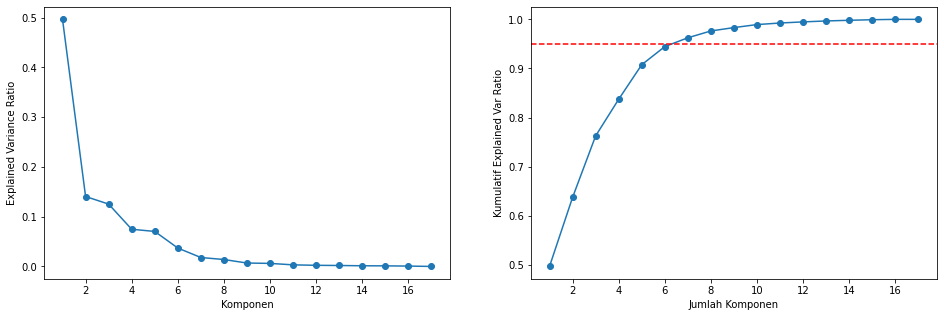

In [119]:
fig,ax=plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,18),pca.explained_variance_ratio_, marker='o')
ax[0].set_xlabel('Komponen')
ax[0].set_ylabel('Explained Variance Ratio')

ax[1].plot(range(1,18),np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.axhline(y=0.95, color='red', linestyle='--')
ax[1].set_xlabel('Jumlah Komponen')
ax[1].set_ylabel('Kumulatif Explained Var Ratio')
plt.show()

Visual Cumulative Explained Variance Ratio menunjukan bahwa dengan hanya menggunakan 7 components kita dapat mempertahankan 95% informasi dari data. Maka, data train akan direduksi menjadi 7 dimensi yang mulanya 17 dimensi.

## PCA

In [120]:
pca_7d = PCA(n_components=7)
pca_7d.fit(train)

train = pca_7d.transform(train)

# Convert to dataframe
train_7d = pd.DataFrame(train, columns=['PCA_' + str(i) for i in range(1, 8)])

In [121]:
train_7d.head()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7
0,0.532475,-0.347457,-0.263197,-0.025651,-0.053065,-0.176756,-0.027287
1,0.473026,0.076876,-0.221544,0.067216,-0.078967,-0.161173,-0.009086
2,-0.728488,-0.251038,0.312658,0.594635,-0.020667,0.072234,0.028783
3,-0.633773,-0.021651,-0.094848,-0.171549,-0.003109,-0.125314,0.069607
4,0.689957,-0.398620,-0.323277,-0.031324,-0.033154,-0.026332,-0.061683


# Model Definition

Untuk kasus clustering ini saya memilih untuk menggunakan 3 algortima yaitu KMeans, Agglomerative Clustering dan Spectral Clustering, namun sebelumnya kita harus menemukan jumlah cluster yang tepat menggunakan perhitungan inertia dan silhouette score.

Text(0, 0.5, 'Inertia')

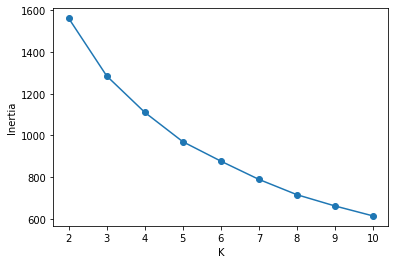

In [122]:
K=[2,3,4,5,6,7,8,9,10]
inertia=[KMeans(n_clusters=i).fit(train_7d).inertia_ for i in K]
plt.plot(K,inertia, marker='o')
plt.xlabel('K')
plt.ylabel('Inertia')

Text(0, 0.5, 'Silhouette Score')

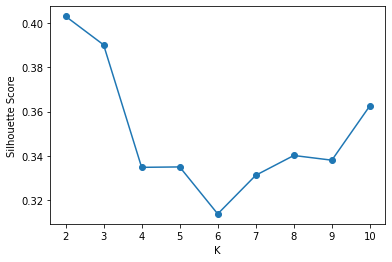

In [123]:
K=[2,3,4,5,6,7,8,9,10]
s_score=[silhouette_score(train_7d, KMeans(n_clusters=i).fit(train_7d).labels_) for i in K]
plt.plot(K, s_score,  marker='o')
plt.xlabel('K')
plt.ylabel('Silhouette Score')

In [124]:
s_score

[0.40300830451374287,
 0.3901174532730184,
 0.33489164106416236,
 0.3350763376372068,
 0.31389493676219704,
 0.3313155567437655,
 0.34023609784203585,
 0.33811715511947354,
 0.36265580272169684]

Dari hasil Silhouette score ternyata jumlah cluster 2 memiliki score paling tinggi yaitu 0.4, maka dari itu kita akan membuat model dengan jumlah cluster 2.

# Model Training

## KMeans

In [125]:
kmeans = KMeans(n_clusters=2, random_state=17)
kmeans.fit(train_7d)

KMeans(n_clusters=2, random_state=17)

## Agglomerative Clustering

In [126]:
agg = AC(n_clusters=2)
agg.fit(train_7d)

AgglomerativeClustering()

## Spectral Clustering

In [127]:
spec = SC(n_clusters=2, random_state=17)
spec.fit(train_7d)

SpectralClustering(n_clusters=2, random_state=17)

# Model Evaluation

## 2Dimensional PCA

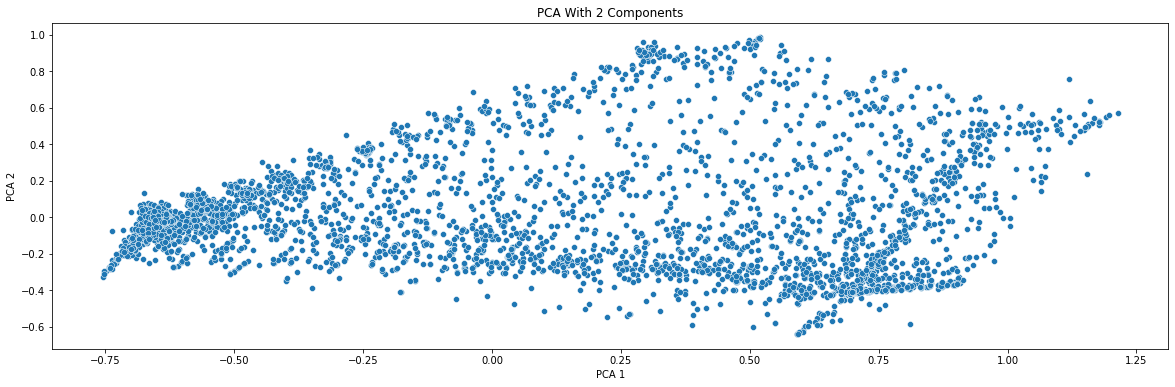

In [128]:
X2D=PCA(n_components=2).fit_transform(train_7d)

plt.figure(figsize=(20, 6))
sns.scatterplot(x=X2D[:,0],y=X2D[:,1])
plt.title('PCA With 2 Components')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

## 2Dimensional KMeans

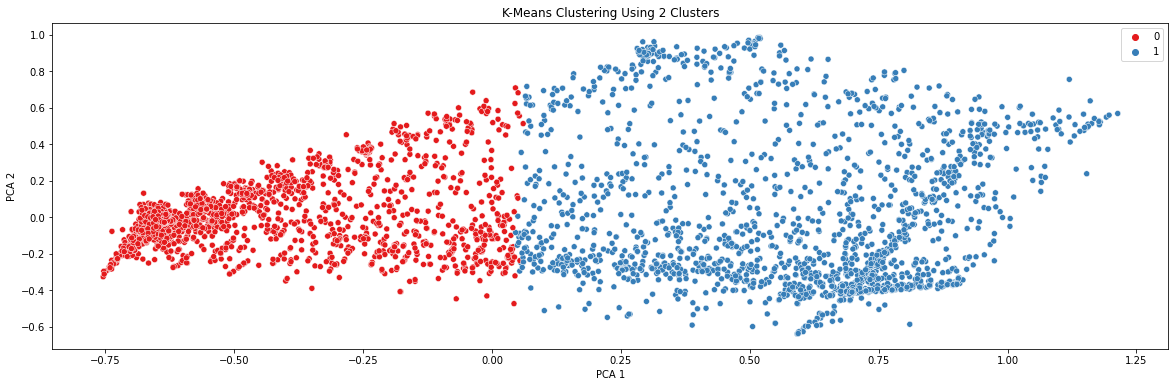

In [129]:
plt.figure(figsize=(20, 6))
sns.scatterplot(x='PCA_1', y='PCA_2', hue=kmeans.labels_, data=train_7d, palette='Set1')
plt.title('K-Means Clustering Using 2 Clusters')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

## 2Dimensional Agglomerative Clustering

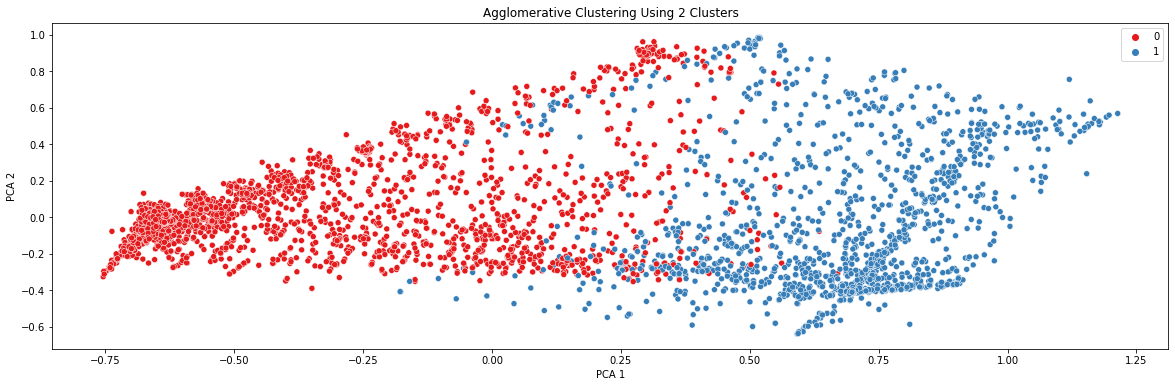

In [130]:
plt.figure(figsize=(20, 6))
sns.scatterplot(x='PCA_1', y='PCA_2', hue=agg.labels_, data=train_7d, palette='Set1')
plt.title('Agglomerative Clustering Using 2 Clusters')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

## 2Dimensional Spectral Clustering

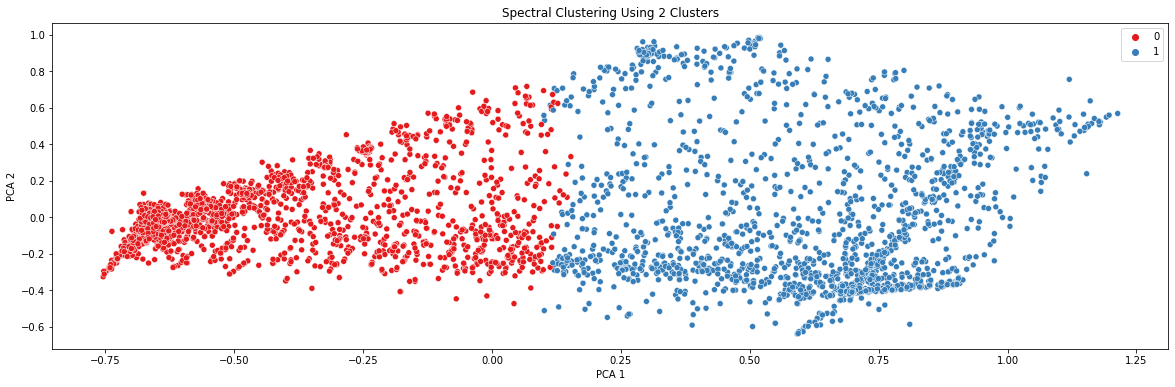

In [131]:
plt.figure(figsize=(20, 6))
sns.scatterplot(x='PCA_1', y='PCA_2', hue=spec.labels_, data=train_7d, palette='Set1')
plt.title('Spectral Clustering Using 2 Clusters')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

Dari ketiga visual hasil clustering di atas kita bisa melihat bahwa hasil clustering menggunakan KMeans paling baik karena datanya terpisah dengan rapih, tidak ada yang bertumpuk/bercampur, dan jelas pembagian clusternya. Kita akan memilih KMeans untuk melakukan testing pada inference set.

# Model Inference

## Inferencing

In [132]:
test

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2623,4696.525962,0.875000,604.33,435.0,169.33,6400.248453,0.500000,0.375000,0.125000,0.375000,7,5,8000.0,840.965985,930.049801,0.000000,8
2137,134.299115,0.909091,1059.18,0.0,1059.18,0.000000,0.833333,0.000000,0.833333,0.000000,0,10,4000.0,1201.538972,159.033099,0.727273,12
4234,1817.150299,1.000000,596.50,0.0,596.50,1736.759805,0.833333,0.000000,0.833333,0.583333,11,10,3000.0,891.637597,474.182947,0.000000,12
2508,2948.966018,1.000000,4129.97,1804.1,2325.87,451.622190,1.000000,0.750000,1.000000,0.250000,4,56,5000.0,2557.014611,605.697272,0.000000,12
4250,4507.000722,1.000000,7394.18,2288.2,5105.98,5424.701791,1.000000,0.916667,1.000000,0.833333,40,130,11000.0,10460.879460,1076.589500,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,50.853021,1.000000,428.75,0.0,428.75,0.000000,1.000000,0.000000,1.000000,0.000000,0,18,8000.0,319.919021,107.187821,0.090909,12
3015,2502.264409,1.000000,0.00,0.0,0.00,2368.872642,0.000000,0.000000,0.000000,0.083333,2,0,10000.0,541.308981,724.956358,0.000000,12
1460,136.323936,1.000000,289.90,0.0,289.90,0.000000,0.333333,0.000000,0.250000,0.000000,0,4,9500.0,714.619326,209.589155,0.000000,12
2234,161.576879,0.909091,194.00,59.0,135.00,0.000000,0.416667,0.083333,0.333333,0.000000,0,6,5000.0,738.457844,197.425096,0.100000,12


In [133]:
# scaling test set
test_scaled = scaler.transform(test)
test = pd.DataFrame(test_scaled, columns=test.columns)

In [134]:
# reduksi dimensi test-set
test = pca_7d.transform(test)
test_7d = pd.DataFrame(test, columns=['PCA_' + str(i) for i in range(1, 8)])
test_7d

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7
0,-0.168203,0.211841,-0.061548,0.417117,0.481353,0.178669,0.018495
1,0.615770,-0.328470,0.390077,-0.308738,0.028489,-0.009636,-0.004255
2,0.444305,-0.327089,-0.337730,-0.075856,0.042667,0.113894,-0.271008
3,0.884350,0.250723,-0.335302,0.147259,-0.071261,0.107847,-0.049706
4,0.924531,0.459426,-0.433547,0.135862,0.013310,0.594861,-0.235196
...,...,...,...,...,...,...,...
219,0.720079,-0.387661,-0.223126,-0.068202,-0.049261,-0.030282,0.073388
220,-0.630217,0.011241,-0.120213,-0.192911,-0.000277,0.044654,0.189961
221,-0.233779,-0.091797,-0.144176,-0.128039,-0.036223,-0.055529,0.169147
222,-0.097012,-0.087270,-0.033190,-0.072775,-0.071296,-0.098603,0.066124


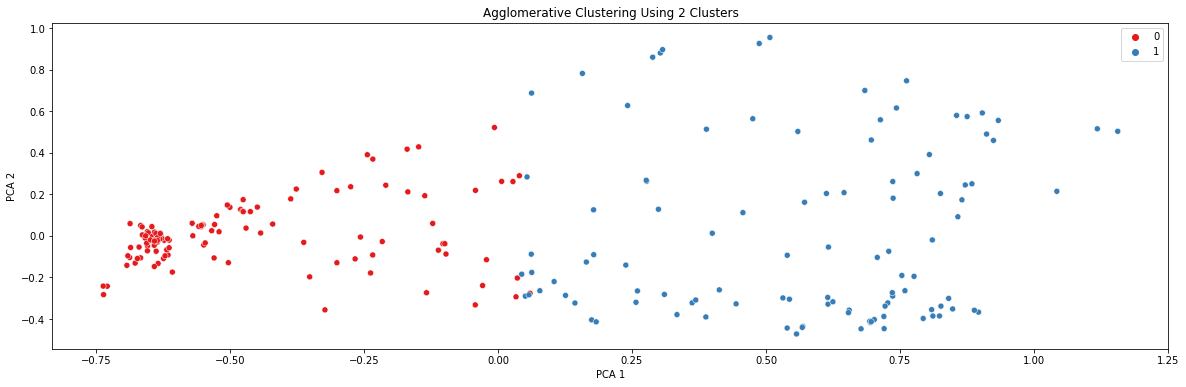

In [135]:
pred = kmeans.predict(test_7d)

plt.figure(figsize=(20, 6))
sns.scatterplot(x='PCA_1', y='PCA_2', hue=pred, data=test_7d, palette='Set1')
plt.title('Agglomerative Clustering Using 2 Clusters')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

Hasil visual di atas menunjukan hasil clustering pada Test-Set dan ternyata model kita bisa melakukan clustering dengan baik karena tidak ada data yang bertumpuk dan bercampur.

## Clustering Analysis

In [136]:
data_pca = pd.concat([train_7d, test_7d])
data_pred = kmeans.predict(data_pca)

In [137]:
cluster_data = data.copy()
cluster_data['CLUSTER'] = data_pred
cluster_data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,3091,3.833185,0.125,45.00,45.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,500.0,0.000000,NaN,0.0,8,1
1,5069,0.000000,0.000,176.03,176.03,0.0,0.0,0.125,0.125,0.0,0.0,0,1,7000.0,0.000000,NaN,0.0,8,1
2,6075,757.964752,0.875,157.40,157.40,0.0,0.0,0.125,0.125,0.0,0.0,0,6,1200.0,1494.480376,2638.598410,0.0,8,0
3,6291,264.566591,0.375,1150.00,1150.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,1200.0,3029.380326,85.428885,0.0,8,0
4,7755,440.613643,1.000,600.00,600.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,1000.0,215.316424,137.846006,0.0,8,1


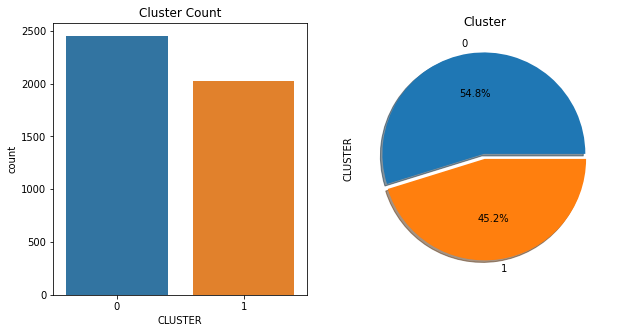

In [138]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='CLUSTER', data=cluster_data)
plt.title('Cluster Count')

plt.subplot(1, 2, 2)
cluster_data['CLUSTER'].value_counts().plot(kind='pie', autopct='%1.1f%%', explode=[0.05, 0], shadow=True)
plt.title('Cluster')
plt.show()

Kita bisa melihat jumlah data tiap cluster dari visual di atas, cluster 0 memiliki jumlah lebih banyak yaitu sebanyak 54.8% dari keseluruhan data dan cluster 1 sebanyak 45.2% dari keseluruhan data.

In [139]:
c0_df = cluster_data[cluster_data['CLUSTER'] == 0]
c1_df = cluster_data[cluster_data['CLUSTER'] == 1] 

In [140]:
c0_df.describe().T

,count,mean,std,min,25%,50%,75%,max
CUST_ID,2452.0,4499.288744,2602.348368,1.000000,2260.500000,4485.000000,6745.500000,8949.00000
BALANCE,2452.0,1534.403335,2051.164799,0.000000,121.226934,838.838231,2023.845707,18495.55855
BALANCE_FREQUENCY,2452.0,0.875824,0.238958,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,2452.0,973.164254,2041.763218,0.000000,28.762500,344.410000,1063.337500,35131.16000
ONEOFF_PURCHASES,2452.0,575.874311,1630.293819,0.000000,0.000000,41.790000,551.820000,34087.73000
INSTALLMENTS_PURCHASES,2452.0,397.569192,893.009345,0.000000,0.000000,79.005000,441.507500,14686.10000
CASH_ADVANCE,2452.0,964.453796,1849.251570,0.000000,0.000000,0.000000,1168.396751,16323.64243
PURCHASES_FREQUENCY,2452.0,0.485736,0.401613,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,2452.0,0.200929,0.296128,0.000000,0.000000,0.083333,0.258929,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,2452.0,0.358378,0.396103,0.000000,0.000000,0.166667,0.750000,1.00000


In [141]:
c1_df.describe().T

,count,mean,std,min,25%,50%,75%,max
CUST_ID,2023.0,4445.560554,2561.764433,5.000000,2208.000000,4447.000000,6655.000000,8945.00000
BALANCE,2023.0,1598.115969,2097.053954,0.000000,126.337423,907.982017,2072.781490,15532.33972
BALANCE_FREQUENCY,2023.0,0.878278,0.237380,0.000000,0.900000,1.000000,1.000000,1.00000
PURCHASES,2023.0,1039.718739,2081.888727,0.000000,45.650000,377.790000,1138.775000,41050.40000
ONEOFF_PURCHASES,2023.0,621.211794,1681.106269,0.000000,0.000000,45.650000,607.700000,40624.06000
INSTALLMENTS_PURCHASES,2023.0,418.674518,865.849404,0.000000,0.000000,98.400000,478.750000,12541.00000
CASH_ADVANCE,2023.0,1008.329497,2290.719114,0.000000,0.000000,0.000000,1093.100593,47137.21176
PURCHASES_FREQUENCY,2023.0,0.496449,0.404491,0.000000,0.083333,0.500000,1.000000,1.00000
ONEOFF_PURCHASES_FREQUENCY,2023.0,0.203965,0.300764,0.000000,0.000000,0.083333,0.250000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,2023.0,0.370562,0.399409,0.000000,0.000000,0.181818,0.750000,1.00000


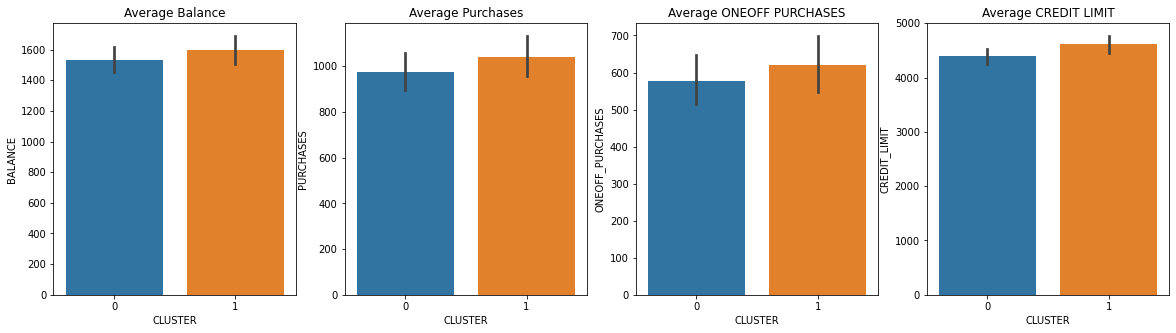

In [142]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
sns.barplot(data=cluster_data, x="CLUSTER", y="BALANCE")
plt.title('Average Balance')

plt.subplot(1, 4, 2)
sns.barplot(data=cluster_data, x="CLUSTER", y="PURCHASES")
plt.title('Average Purchases')

plt.subplot(1, 4, 3)
sns.barplot(data=cluster_data, x="CLUSTER", y="ONEOFF_PURCHASES")
plt.title('Average ONEOFF PURCHASES')

plt.subplot(1, 4, 4)
sns.barplot(data=cluster_data, x="CLUSTER", y="CREDIT_LIMIT")
plt.title('Average CREDIT LIMIT')
plt.show()

Dari visual di atas kita bisa melihat bahwa cluster 1 memiliki rata-rata jumlah saldo lebih banyak dari cluster 0, rata-rata pembelian yang lebih banyak daripada cluster 0, rata-rata harga barang lebih tinggi per transaksi dibandingkan cluster 0, dan juga memiliki limit lebih tinggi dibandingkan cluster 0.

# Kesimpulan

Dataset kali ini berisikan data-data kartu kredit dalam 6 bulan terakhir dari sebuah bank. Data-datanya berisi seperti jumlah saldo, jumlah pembelian, frekuensi pembelian, limit kartu kredit, dan lain-lain. Kita bisa melihat bahwa rata-rata klien bank ini memiliki saldo sebesar 1563 dollar dan rata-rata pembelian sebesar 1003 dollar. Kita juga mengetahui rata-rata harga barang yang dibayar sekali sebesar 596 dollar, dan rata-rata harga barang yang dicicil adalah 407 dollar, jadi kebanyakan orang menyicil barang dengan harga lebih murah dibandingkan dengan yang sekali bayar. Kita juga bisa melihat beragam limit kartu kredit dari 50 dollar hingga 30000 dollar dengan rata-rata limit 4400 dollar.

Dari data di atas kita akan melakukan clustering menggunakan 3 model yaitu Kmeans, agglomerative clustering dan spectral clustering dimana sebelumnya akan dilakukan dulu pengurangan dimensi(PCA) untuk mempermudah clustering. Dari 17 kolom kita bisa mereduksi menjadi hanya 7 kolom saja menggunakan PCA dan tetap mempertahankan 95% kualitas data.

Kita melakukan clustering menggunakan 3 model clustering dengan jumlah cluster 2 dimana jumlah tersebut diperoleh dari hasil inertia dan silhouette score. Secara sekilas kita bisa melihat bahwa hasil clustering antar model kita cukup baik namun model KMeans memperoleh hasil paling baik diantara 3 model karena secara visual pada model KMeans tidak ada data yang bercampur/bertumpuk dimana hal tersebut terjadi pada 2 model lain.

Hasil Cluster :
1. Cluster 0 : 
> * Data pada cluster ini berjumlah 2452 data atau 54.8% dari keseluruhan data
> * Memiliki rata-rata saldo, rata-rata pembelian, dan rata-rata limit kartu yang lebih rendah dibandingkan cluster 1
2. Cluster 1 : 
> * Data pada cluster ini berjumlah 2023 data atau 45.2% dari keseluruhan data
> * Memiliki rata-rata saldo, rata-rata pembelian, dan rata-rata limit kartu yang lebih tinggi dibandingkan cluster 0

Jadi bisa kita lihat bahwa cluster 1 adalah cluster yang berisi klien yang lebih sering berbelanja dan memiliki lebih banyak uang karena limit dan jumlah saldonya lebih tinggi daripada cluster 0.

# Soal

## Soal 1

Apakah yang dimaksud dengan inertia pada algoritma K-Means ?

Inertia merupakan pengukuran seberapa baik suatu dataset diclustering menggunakan KMeans. Inertia mengukur jarak antara data point dan centroidnya. Model yang bagus adalah model dengan inertia rendah dan jumlah cluster rendah.

Sumber : https://www.codecademy.com/learn/machine-learning/modules/dspath-clustering/cheatsheet

## Soal 2

Jelaskan yang dimaksud dengan Elbow Method (alasan penggunaan, cara penggunaan, kelemahan/kelebihan, dll) !

Elbow method merupakan salah satu metode yang paling populer untuk menentukan jumlah clustering atau K. Untuk mencari nilai optimumnya kita akan memilih jumlah cluster dimana sudah tidak terjadi penurunan yang signifikan pada grafik.

## Soal 3

Jelaskan perbedaan masing-masing algoritma clustering yang anda gunakan dalam kasus ini !

Kmeans clustering melakukan clustering dengan menentukan jumlah cluster kemudian memilih lokasi centroid terbaik untuk tiap cluster, agg clustering adalah metode clustering yang menggunakan hierarki sebagai metode clusternya, spectral clustering adalah metode clustering untuk data yang persebarannya tidak berkelompok(berjauhan) dalam satu cluster. 

sumber 1 : https://www.quora.com/What-is-the-difference-between-spectral-clustering-and-k-means-clustering

sumber 2 : https://www.kode.id/courses/take/ftds1/pdfs/26410272-day-2-pm-clustering-part-2
